# 55 Cancri e

This doesn't work well


In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

import astropy.units as u

In [2]:
name = '55-CNC'

In [10]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))
# Not sure if i'm using all the data here need to check!
#fnames = np.hstack([fnames, glob(f'/Volumes/Nibelheim/hst/data/{name}-eclipse/*.fits')])
fnames = np.sort(fnames)
obs = om.Observation.from_files(fnames, planet_letter='e')

/Users/ch/HST/projects/ombre/src/ombre/visit.py:208: RuntimeWarning: divide by zero encountered in true_divide
  w[self.err / self.sci > 0.1] = 1e10


In [11]:
obs

55-CANCRI [4 Visits]

In [12]:
clc = lk.search_lightcurve('55 Cancri', author='SPOC').download().remove_nans().flatten(501)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

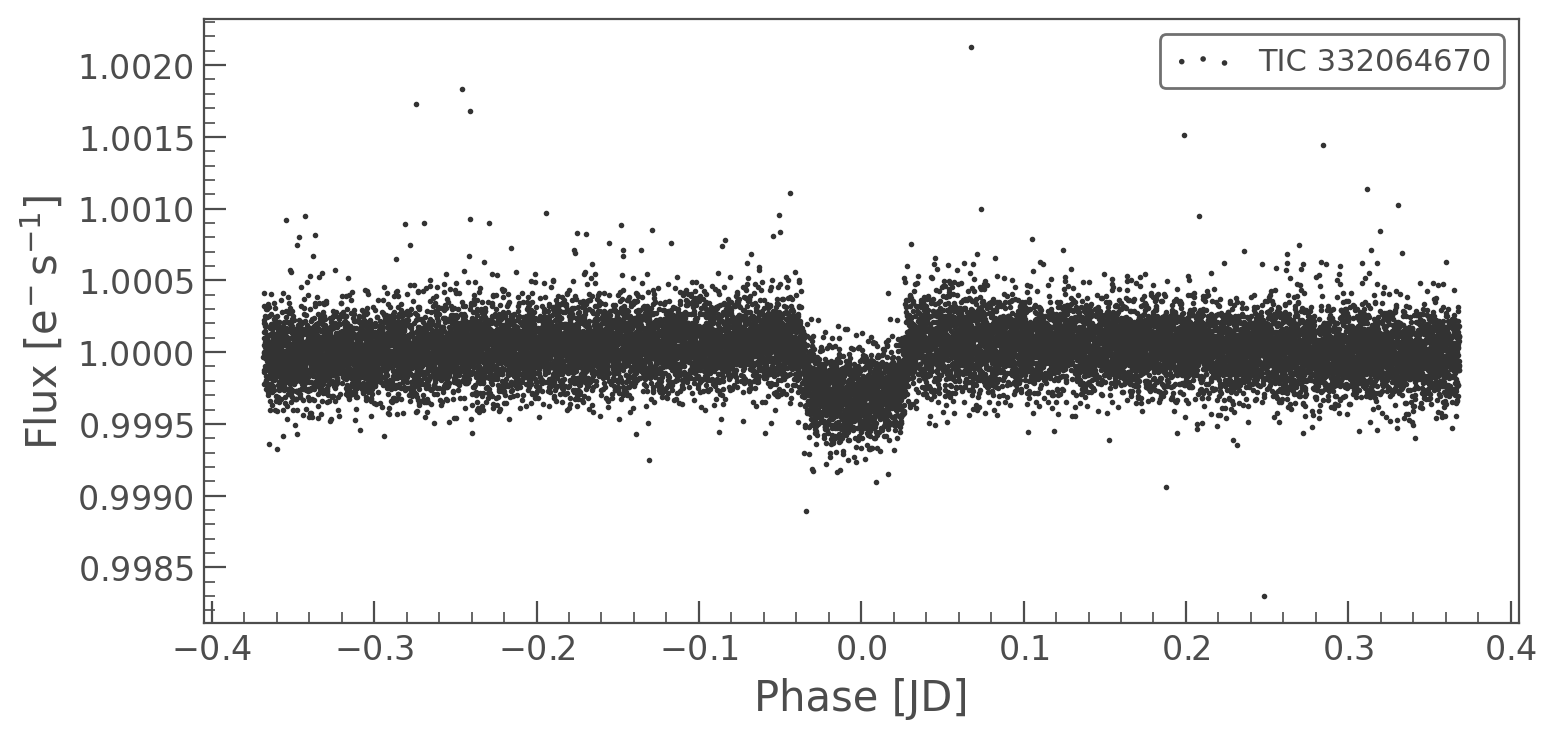

In [13]:
clc.fold(obs.period, obs.t0 - 2457000).scatter()

In [22]:
obs.fit_transit()

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

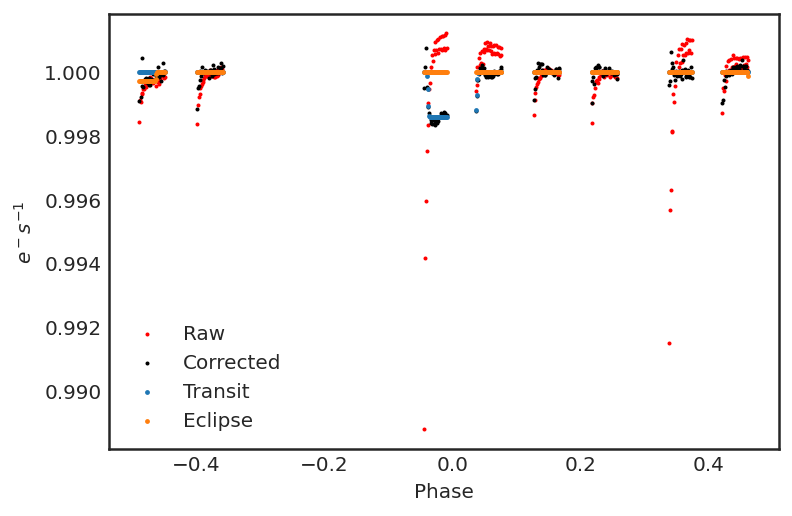

In [23]:
obs.plot()

In [16]:
obs.fit_model()


Fitting Transit/Eclipse Model: 100%|██████████████████████████| 4/4 [04:16<00:00, 64.08s/it]


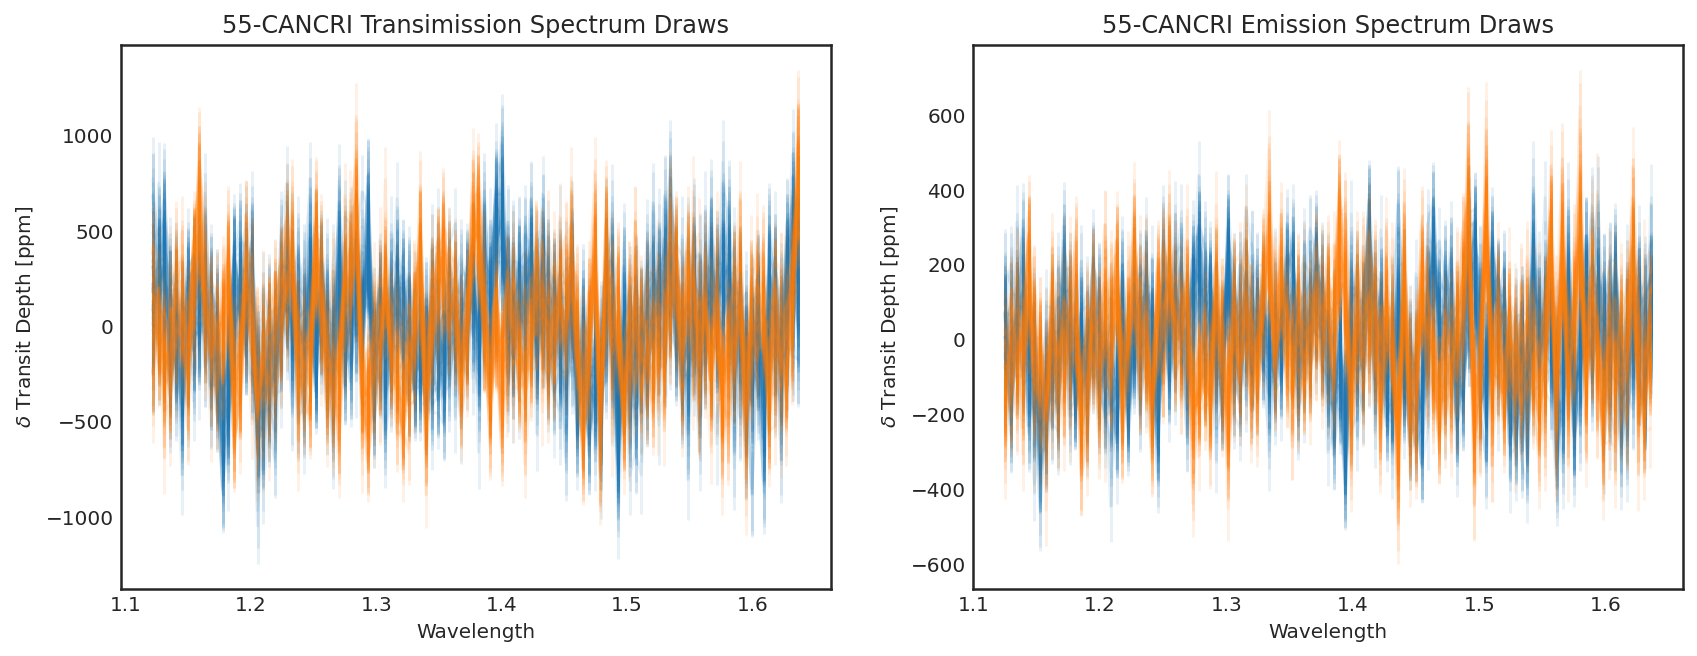

In [17]:
obs.plot_spectra()

<AxesSubplot:title={'center':'55-CANCRI Transmission Spectrum, Visit: 1'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

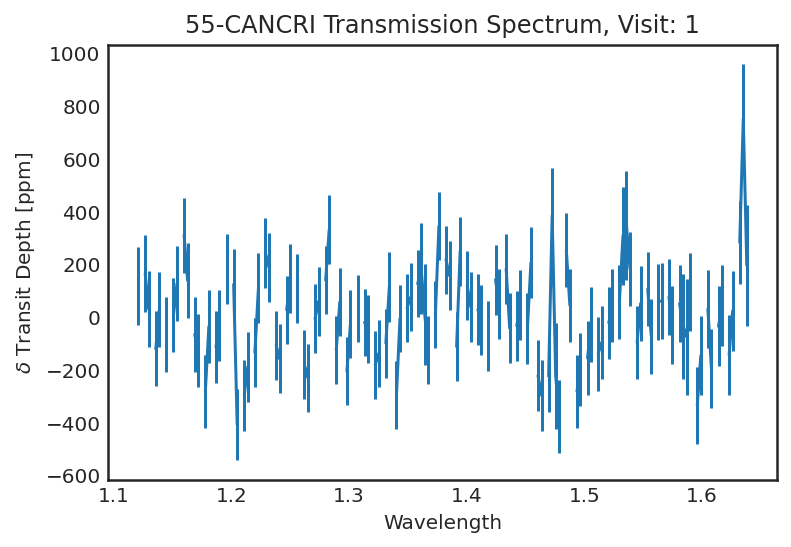

In [18]:
om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0 ]).flatten().bin(bins=np.linspace(0.8, 1.7, 300)).plot()

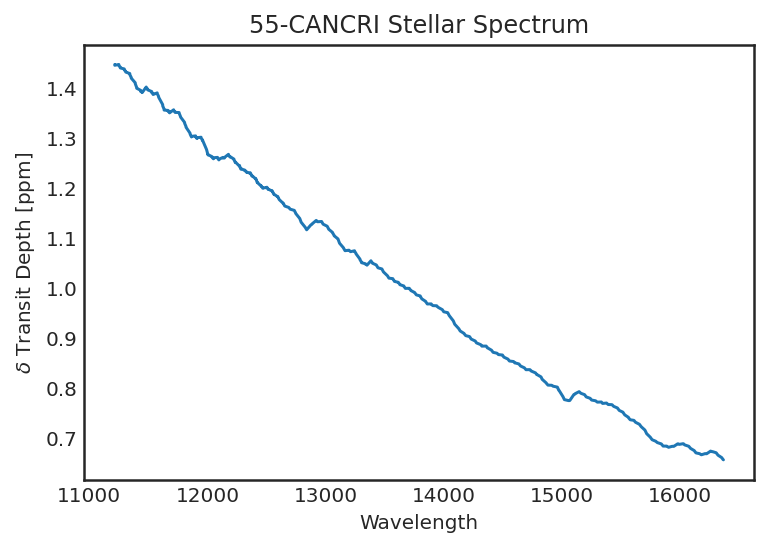

In [19]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [20]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

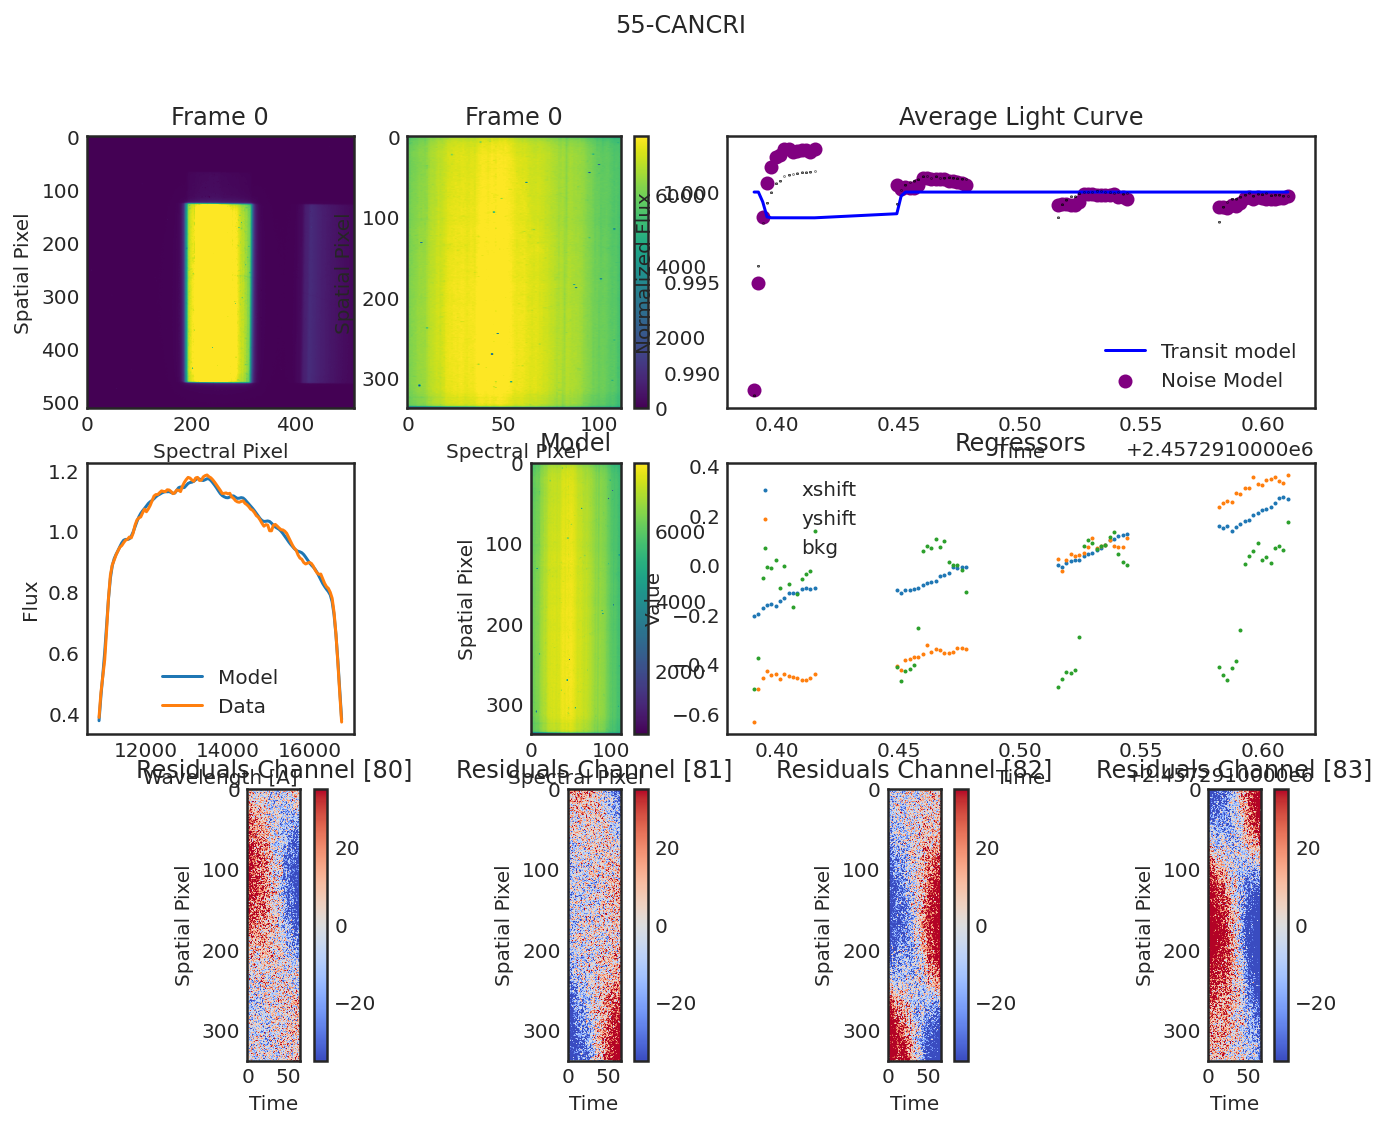

NameError: name 'braek' is not defined

In [24]:
for visit in obs:
    visit.diagnose();
    plt.show();
    break